In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from models.CNN_model import CNN
from models.CNN_SE_model import CNN_SE

In [3]:
MODEL_CNN_PATH = "saved-models/cnn.pt"
MODEL_CNN_SE_PATH = "saved-models/cnn-se.pt"

Out Channels: 32, In Channels: 16, Kernel Size: [3, 3]
Figure Height: 17, Figure Width: 33, Figure Channels: 3


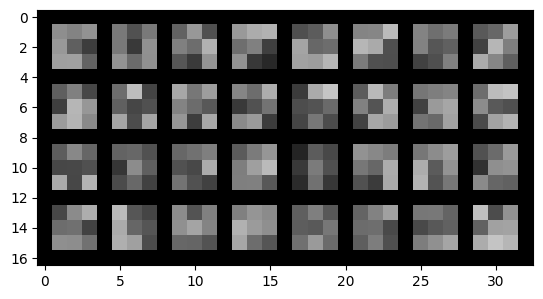

<Figure size 640x480 with 0 Axes>

In [66]:
def view_kernels(kernels: torch.Tensor, output_file_name: str, ch=0):
    out_ch, in_ch, *ksize = kernels.shape
    print(f"Out Channels: {out_ch}, In Channels: {in_ch}, Kernel Size: {ksize}")

    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()

    if in_ch != 3:
        #[out_channels, in_channels, kernel_width, kernel_height]
        kernels = kernels[:, ch, :, :].unsqueeze(dim=1)

    imgs = torchvision.utils.make_grid(kernels, padding=1)
    imgs = imgs.cpu()
    imgs = imgs.permute(1,2,0)
    fig_height, fig_width, fig_channels = imgs.shape
    print(f"Figure Height: {fig_height}, Figure Width: {fig_width}, Figure Channels: {fig_channels}")

    plt.figure()
    plt.imshow(imgs)
    plt.show()
    plt.savefig(output_file_name)



model: CNN = torch.load(MODEL_CNN_PATH)
# view_kernels(model.conv1.weight.detach().clone().cpu(), "CNN-layer1-kernel.png")
view_kernels(model.conv2.weight.detach().clone().cpu(), "CNN-layer2-kernel.png", ch=8)
# view_kernels(model.conv3.weight.detach().clone(), "CNN-layer3-kernel.png")


In [ ]:
model: CNN_SE = CNN_SE()
model.load_state_dict(torch.load(MODEL_CNN_SE_PATH))

view_kernels(model.conv1.weight.detach().clone(), "CNNSE-layer1-kernel.png")
view_kernels(model.conv2.weight.detach().clone(), "CNNSE-layer2-kernel.png")
view_kernels(model.conv3.weight.detach().clone(), "CNNSE-layer3-kernel.png")